In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

from pyuvdata import UVData
from pyuvdata.data import DATA_PATH


In [2]:
testfile = os.path.join(DATA_PATH, 'day2_TDEM0003_10s_norx_1src_1spw.uvfits')
uv_object = UVData()
uv_object.read(testfile, run_check_acceptability=False)



Telescope EVLA is not in known_telescopes.


In [27]:
temp_obj = uv_object.copy(metadata_only=True)


if temp_obj.phase_center_frame is not None:
    output_phase_frame = temp_obj.phase_center_frame
else:
    output_phase_frame = 'icrs'

# output_phase_frame = 'gcrs'
    
temp_obj.set_uvws_from_antenna_positions(
    allow_phasing=True, output_phase_frame=output_phase_frame)

if not np.allclose(temp_obj.uvw_array, uv_object.uvw_array, atol=1):
    print(np.max(np.abs(temp_obj.uvw_array - uv_object.uvw_array)))
    print('uvw_array does not match the expected values '
                     'given the antenna positions.')


144.92027206260502
uvw_array does not match the expected values given the antenna positions.


In [28]:
diff = temp_obj.uvw_array - uv_object.uvw_array
print(diff.shape)
np.max(np.abs(diff))

(1360, 3)


144.92027206260502

In [29]:
diff_length = np.linalg.norm(diff, axis=1)
print(diff_length.shape)
np.max(np.abs(diff_length))

(1360,)


148.26345754417088

In [30]:
mean_pos = (temp_obj.uvw_array + uv_object.uvw_array) / 2
diff_ratio = (diff)/ mean_pos
np.max(np.abs(diff_ratio))

172.49344042481073

In [31]:
mean_len = (np.linalg.norm(temp_obj.uvw_array, axis=1) + np.linalg.norm(uv_object.uvw_array, axis=1))/2
diff_len_ratio = (diff_length) / mean_len
np.max(np.abs(diff_len_ratio))

0.18689991698875863

In [32]:
diff_len_ratio2 = (diff_length) / (np.linalg.norm(mean_pos))
np.max(np.abs(diff_len_ratio))

0.18689991698875863

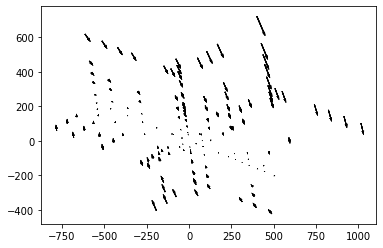

In [33]:
plt.quiver(mean_pos[:, 0], mean_pos[:, 1], diff[:, 0], diff[:, 1])

In [34]:
temp_obj2 = uv_object.copy(metadata_only=True)

temp_obj2.unphase_to_drift(use_ant_pos=True)

In [35]:
diff_drift = uv_object.uvw_array - temp_obj2.uvw_array
mean_pos_drift = (temp_obj2.uvw_array + uv_object.uvw_array) / 2


np.max(np.abs(diff_drift))

274.5441556032373

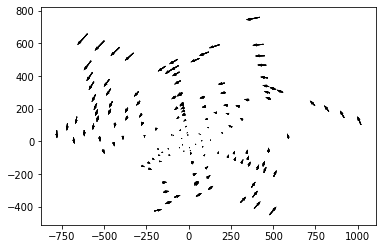

In [36]:
plt.quiver(mean_pos_drift[:, 0], mean_pos_drift[:, 1], diff_drift[:, 0], diff_drift[:, 1])

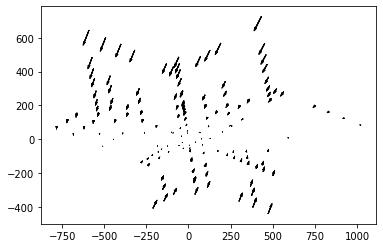

In [37]:
diff_temp = temp_obj.uvw_array - temp_obj2.uvw_array
mean_pos_temp = (temp_obj2.uvw_array + temp_obj.uvw_array) / 2

plt.quiver(mean_pos_temp[:, 0], mean_pos_temp[:, 1], diff_temp[:, 0], diff_temp[:, 1])

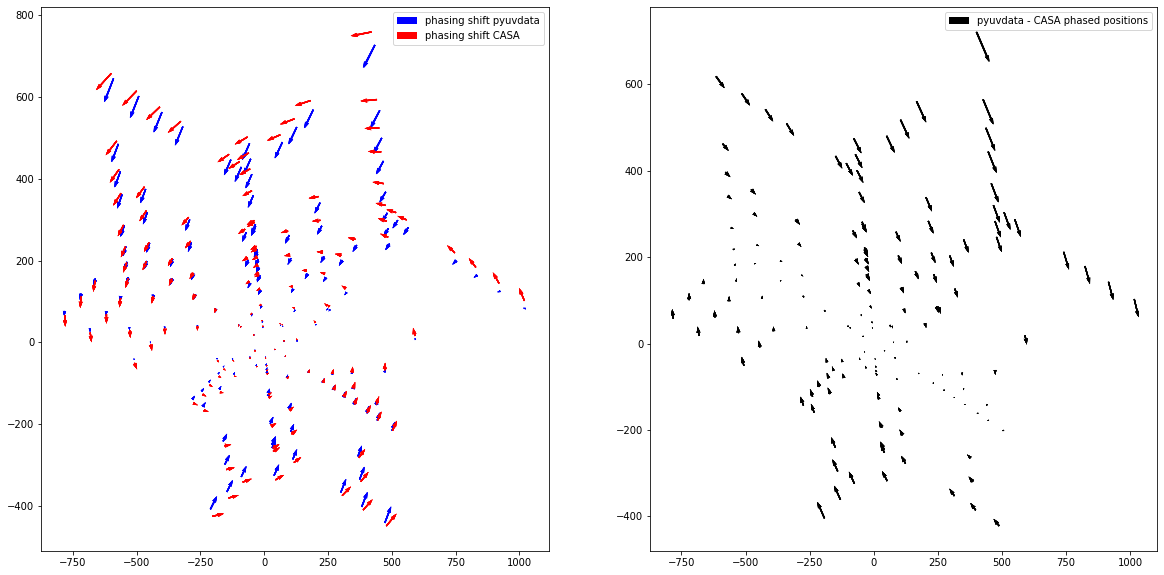

In [38]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.quiver(mean_pos_temp[:, 0], mean_pos_temp[:, 1], diff_temp[:, 0], diff_temp[:, 1],
          color='blue', label='phasing shift pyuvdata')
plt.quiver(mean_pos_drift[:, 0], mean_pos_drift[:, 1], diff_drift[:, 0], diff_drift[:, 1],
           color='red', label='phasing shift CASA')
plt.legend()
plt.subplot(1,2,2)
plt.quiver(mean_pos[:, 0], mean_pos[:, 1], diff[:, 0], diff[:, 1],
           label='pyuvdata - CASA phased positions')
plt.legend()

In [40]:
temp_obj3 = uv_object.copy(metadata_only=True)
temp_obj3.unphase_to_drift()

139.3537961337908


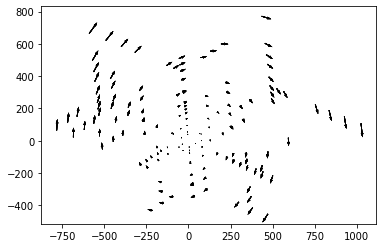

In [42]:
diff_temp_drift = temp_obj2.uvw_array - temp_obj3.uvw_array
mean_pos_temp_drift = (temp_obj2.uvw_array + temp_obj3.uvw_array) / 2
print(np.max(np.abs(diff_temp_drift)))

plt.quiver(mean_pos_temp_drift[:, 0], mean_pos_temp_drift[:, 1], diff_temp_drift[:, 0], diff_temp_drift[:, 1])